# First steps

Import needed packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Import datasets train
df= pd.read_csv('train.csv')
print(df.shape)

(31428, 27)


In [3]:
#Import datasets test
df_test=pd.read_csv('test1.csv')
print(df_test.shape)

(32086, 27)


In [4]:
df

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,37,19274330,-1,0,2569487005,1830830742,4228834423,652481754,2967512603,...,0,0,0,0,0,0,0,419316267,3617851689,4220791646
1,-1,55,19274334,-1,0,3191875643,403381353,1238330876,652481754,2967512603,...,0,0,0,0,1,0,0,1968545380,3831440054,1213938795
2,-1,114,19274353,-1,0,2634604934,403381353,1928325921,652481754,2967512603,...,0,0,0,0,0,0,0,1405802835,2379633508,1284343215
3,-1,128,19274358,-1,0,2569487005,403381353,296915027,652481754,2967512603,...,0,0,0,0,0,0,0,2299319102,3617851689,4220791646
4,-1,164,19274367,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,1306075469,3617851689,4220791646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31423,-1,638420,19360259,-1,23,2569487005,2018710401,1712143179,2308170622,2967512603,...,0,0,0,0,0,0,0,773194559,3617851689,4220791646
31424,-1,638422,19360260,-1,23,2569487005,403381353,2280365090,652481754,2967512603,...,0,0,0,0,0,0,0,4038791635,3617851689,4220791646
31425,-1,638461,19360392,-1,23,497926344,1235983246,1379688777,652481754,2116767313,...,0,0,0,0,0,0,0,1169636883,621902171,3706004275
31426,-1,638496,19360528,-1,23,2569487005,403381353,2780744710,652481754,2967512603,...,0,0,0,0,0,0,0,357042422,3617851689,4220791646


Data preparation

In [5]:
df.columns

Index(['label', 'id', 'visitTime', 'purchaseTime', 'hour', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'C9', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'C10', 'C11', 'C12'],
      dtype='object')

Missing Value Check

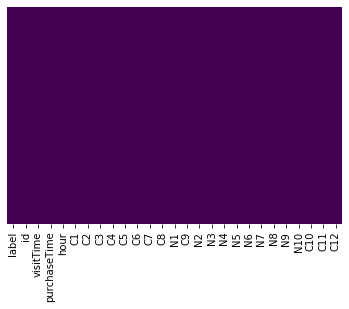

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Feature selection

In [7]:
corrMatrix = df.corr()
print (corrMatrix)

                 label        id  visitTime  purchaseTime      hour        C1  \
label         1.000000  0.006510   0.005782      1.000000  0.005959 -0.002729   
id            0.006510  1.000000   0.985723      0.006543  0.984233  0.011131   
visitTime     0.005782  0.985723   1.000000      0.005815  0.998092  0.011742   
purchaseTime  1.000000  0.006543   0.005815      1.000000  0.005992 -0.002730   
hour          0.005959  0.984233   0.998092      0.005992  1.000000  0.011623   
C1           -0.002729  0.011131   0.011742     -0.002730  0.011623  1.000000   
C2            0.003435 -0.031077  -0.021600      0.003442 -0.021613  0.024736   
C3           -0.000707 -0.014507  -0.011627     -0.000712 -0.012099  0.021227   
C4           -0.005857  0.048138   0.051565     -0.005860  0.051268  0.042015   
C5            0.008654 -0.044974  -0.040371      0.008663 -0.039976  0.049402   
C6            0.017486  0.027836   0.059132      0.017483  0.058947  0.013999   
C7           -0.036506  0.00

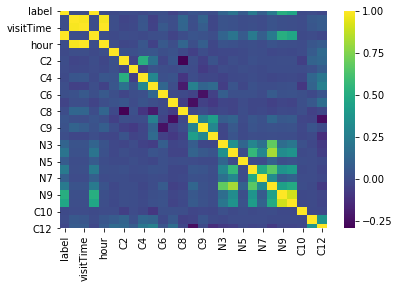

In [8]:
sns.heatmap(df.corr(), cmap = 'viridis')

In [9]:
# Delete "id" because single use value and "hour" because it is highly correlated to "visitTime"
df = df.drop("id",axis =1)
df = df.drop("hour",axis = 1)

In [10]:
df.head()

,label,visitTime,purchaseTime,C1,C2,C3,C4,C5,C6,C7,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,19274330,-1,2569487005,1830830742,4228834423,652481754,2967512603,3624739744,2303407174,...,0,0,0,0,0,0,0,419316267,3617851689,4220791646
1,-1,19274334,-1,3191875643,403381353,1238330876,652481754,2967512603,179712055,2303407174,...,0,0,0,0,1,0,0,1968545380,3831440054,1213938795
2,-1,19274353,-1,2634604934,403381353,1928325921,652481754,2967512603,1607619193,2303407174,...,0,0,0,0,0,0,0,1405802835,2379633508,1284343215
3,-1,19274358,-1,2569487005,403381353,296915027,652481754,2967512603,10212495,2303407174,...,0,0,0,0,0,0,0,2299319102,3617851689,4220791646
4,-1,19274367,-1,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,...,0,0,0,0,0,0,0,1306075469,3617851689,4220791646


# Test / Train

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#Dividing dataset in Test and Train
X = df[df.columns.difference(['label'])]
y = df['label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size = 0.33,stratify = y)

Over and undersampling

In [14]:
import seaborn as sns

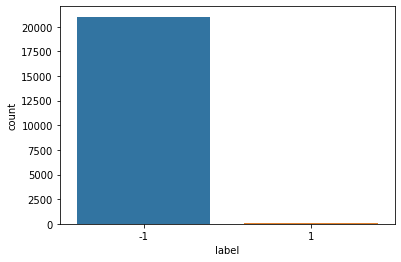

In [15]:
sns.countplot(y_train)

In [16]:
#SMOTE (balancing class occurences)
from imblearn.over_sampling import SMOTE

In [17]:
smt = SMOTE(sampling_strategy = 'minority', random_state = 101)
X_train, y_train = smt.fit_resample(X_train, y_train)

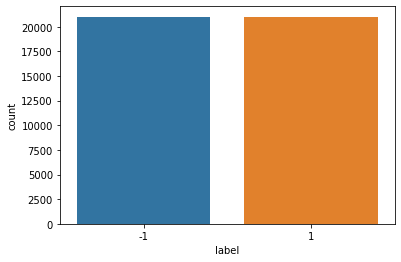

In [18]:
sns.countplot(y_train)

In [19]:
#Normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
print(df.shape)

(31428, 25)


# M1: Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
C = [10, 1, .1, .001]
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

C: 10
Training accuracy: 1.0
Test accuracy: 1.0

C: 1
Training accuracy: 1.0
Test accuracy: 1.0

C: 0.1
Training accuracy: 1.0
Test accuracy: 1.0

C: 0.001
Training accuracy: 1.0
Test accuracy: 1.0



In [23]:
# Using the "C" with the best score
model_lg = LogisticRegression(penalty='l1', C=0.001, solver='liblinear')
model_lg.fit(X_train, y_train)

print(model_lg.score(X_test, y_test))

1.0


In [24]:
ypred = model_lg.predict(X_test)
print(ypred)

[-1 -1 -1 ... -1 -1 -1]


In [25]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
roc_auc_score(y_test, ypred)


1.0

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, ypred)
print (fpr, tpr, thresholds)

[0. 0. 1.] [0. 1. 1.] [ 2  1 -1]


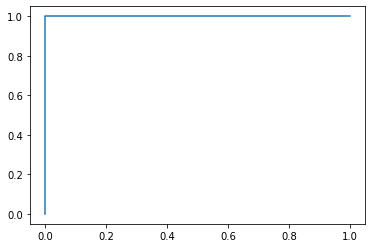

In [27]:
plt.plot(fpr, tpr)

In [28]:
auc = roc_auc_score(y_test,ypred)
print(auc)

1.0


In [29]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     10353
           1       1.00      1.00      1.00        19

    accuracy                           1.00     10372
   macro avg       1.00      1.00      1.00     10372
weighted avg       1.00      1.00      1.00     10372



# M2: Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model_rf = RandomForestClassifier(criterion = "entropy", n_estimators =30)
model_rf.fit(X_train,y_train)

print(model_rf.score(X_test,y_test))

1.0


In [32]:
model_rf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1331439494, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=738063333, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_dept

In [33]:
# class label as an output
y_pred_rf = model_rf.predict(X_test)

In [34]:
# proba as an output
y_prob_rf = model_rf.predict_proba(X_test)

In [35]:
roc_auc_score(y_test, y_pred_rf)

1.0

In [36]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_rf)
print (fpr1, tpr, thresholds)

[0. 0. 1.] [0. 1. 1.] [ 2  1 -1]


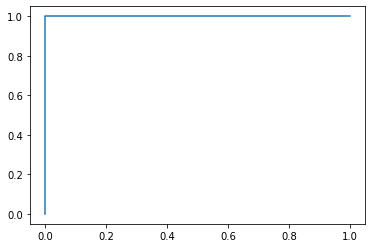

In [37]:
plt.plot(fpr1, tpr1)

In [38]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     10353
           1       1.00      1.00      1.00        19

    accuracy                           1.00     10372
   macro avg       1.00      1.00      1.00     10372
weighted avg       1.00      1.00      1.00     10372



# Using Model on Test Data Set

In [39]:
df_test.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,1,19360733,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,2128770044,3617851689,4220791646
1,-1,2,19360734,-1,0,2416811818,1235983246,3653557526,652481754,2116767313,...,0,0,0,0,0,0,0,4256459078,2379633508,1284343215
2,-1,3,19360735,-1,0,3765056181,1235983246,1310333812,652481754,2116767313,...,0,0,0,0,0,0,0,2840358457,3831440054,1213938795
3,-1,4,19360737,-1,0,955802445,403381353,2290282995,652481754,2967512603,...,0,0,0,0,0,0,0,4039873369,535829057,3828748840
4,-1,5,19360752,-1,0,2569487005,2517724481,2463986301,2308170622,2967512603,...,0,0,0,0,0,0,0,907610626,3617851689,4220791646


In [40]:
df_test.columns

Index(['label', 'id', 'visitTime', 'purchaseTime', 'hour', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'C9', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'C10', 'C11', 'C12'],
      dtype='object')

In [41]:
df_test.drop(['hour','label'], axis=1, inplace=True)

In [42]:
df_test.head()

,id,visitTime,purchaseTime,C1,C2,C3,C4,C5,C6,C7,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,1,19360733,-1,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,...,0,0,0,0,0,0,0,2128770044,3617851689,4220791646
1,2,19360734,-1,2416811818,1235983246,3653557526,652481754,2116767313,571765677,2303407174,...,0,0,0,0,0,0,0,4256459078,2379633508,1284343215
2,3,19360735,-1,3765056181,1235983246,1310333812,652481754,2116767313,571765677,2303407174,...,0,0,0,0,0,0,0,2840358457,3831440054,1213938795
3,4,19360737,-1,955802445,403381353,2290282995,652481754,2967512603,1607619193,1342367140,...,0,0,0,0,0,0,0,4039873369,535829057,3828748840
4,5,19360752,-1,2569487005,2517724481,2463986301,2308170622,2967512603,580883881,2303407174,...,0,0,0,0,0,0,0,907610626,3617851689,4220791646


In [43]:
X_val = df_test [['visitTime', 'purchaseTime', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'C9', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'C10', 'C11', 'C12']]

In [44]:
y_val = model_rf.predict_proba(X_val)

In [45]:
#selecting the second column (which is the probability for class 1)
final_prob = y_val[:,1]

In [46]:
df_test['Prob'] = final_prob

In [47]:
df_test.head()

,id,visitTime,purchaseTime,C1,C2,C3,C4,C5,C6,C7,...,N5,N6,N7,N8,N9,N10,C10,C11,C12,Prob
0,1,19360733,-1,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,...,0,0,0,0,0,0,2128770044,3617851689,4220791646,0.733333
1,2,19360734,-1,2416811818,1235983246,3653557526,652481754,2116767313,571765677,2303407174,...,0,0,0,0,0,0,4256459078,2379633508,1284343215,0.733333
2,3,19360735,-1,3765056181,1235983246,1310333812,652481754,2116767313,571765677,2303407174,...,0,0,0,0,0,0,2840358457,3831440054,1213938795,0.733333
3,4,19360737,-1,955802445,403381353,2290282995,652481754,2967512603,1607619193,1342367140,...,0,0,0,0,0,0,4039873369,535829057,3828748840,0.733333
4,5,19360752,-1,2569487005,2517724481,2463986301,2308170622,2967512603,580883881,2303407174,...,0,0,0,0,0,0,907610626,3617851689,4220791646,0.733333


In [48]:
#selecting only Id and probability columns
df_test = df_test[['id', 'Prob']]

In [49]:
df_test.head()

,id,Prob
0,1,0.733333
1,2,0.733333
2,3,0.733333
3,4,0.733333
4,5,0.733333


In [50]:
#saving output to csv
df_test.to_csv('prediction MaximePracisnore_e197419.csv', index=False)